In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm, t
import seaborn as sns
import math
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [3]:
height_data = np.array(
    [
        126.0,
        129.5,
        133.0,
        133.0,
        136.5,
        136.5,
        140.0,
        140.0,
        140.0,
        140.0,
        143.5,
        143.5,
        143.5,
        143.5,
        143.5,
        143.5,
        147.0,
        147.0,
        147.0,
        147.0,
        147.0,
        147.0,
        147.0,
        150.5,
        150.5,
        150.5,
        150.5,
        150.5,
        150.5,
        150.5,
        150.5,
        154.0,
        154.0,
        154.0,
        154.0,
        154.0,
        154.0,
        154.0,
        154.0,
        154.0,
        157.5,
        157.5,
        157.5,
        157.5,
        157.5,
        157.5,
        157.5,
        157.5,
        157.5,
        157.5,
        161.0,
        161.0,
        161.0,
        161.0,
        161.0,
        161.0,
        161.0,
        161.0,
        161.0,
        161.0,
        164.5,
        164.5,
        164.5,
        164.5,
        164.5,
        164.5,
        164.5,
        164.5,
        164.5,
        168.0,
        168.0,
        168.0,
        168.0,
        168.0,
        168.0,
        168.0,
        168.0,
        171.5,
        171.5,
        171.5,
        171.5,
        171.5,
        171.5,
        171.5,
        175.0,
        175.0,
        175.0,
        175.0,
        175.0,
        175.0,
        178.5,
        178.5,
        178.5,
        178.5,
        182.0,
        182.0,
        185.5,
        185.5,
        189.0,
        192.5,
    ]
)

In [4]:
n_height = len(height_data)
mean_height = np.mean(height_data)
std_height = np.std(height_data)
alpha = 0.05 / 2
z = norm.ppf(1 - alpha)

n_height, mean_height, std_height, alpha, z

(100, 159.25, 13.65, 0.025, 1.959963984540054)

In [5]:
lower_x = mean_height - z * (std_height / math.sqrt(n_height))

upper_x = mean_height + z * (std_height / math.sqrt(n_height))

lower_x, upper_x

(156.57464916110283, 161.92535083889717)

In [6]:
# Calculate the error
error = abs(mean_height - lower_x)
error

2.675350838897174

In [7]:
stats.sem(height_data), std_height / math.sqrt(n_height - 1)

(1.3718766178288244, 1.3718766178288246)

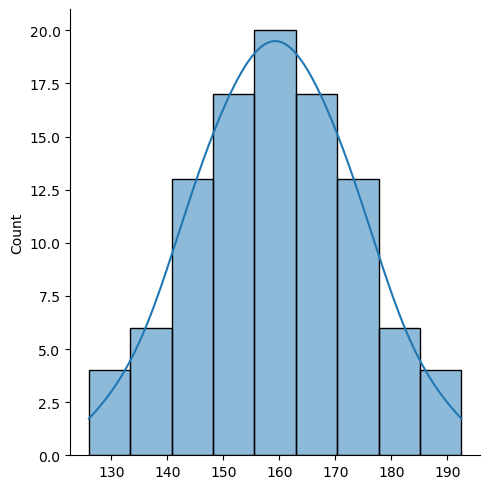

In [8]:
sns.displot(height_data, kde=True)

In [9]:
interval = norm.interval(0.95, mean_height, stats.sem(height_data))

error_margin = (interval[1] - interval[0]) / 2

interval, error_margin

((156.5611712378229, 161.9388287621771), 2.68882876217711)

In [10]:
interval = norm.interval(0.99, mean_height, stats.sem(height_data))

error_margin = (interval[1] - interval[0]) / 2

interval, error_margin

((155.71628000694295, 162.78371999305705), 3.5337199930570478)

### Exercise

In [11]:
salary_data = np.array(
    [
        82.1191,
        72.8014,
        79.1266,
        71.3552,
        59.192,
        79.1952,
        56.518,
        70.3752,
        73.5364,
        61.0407,
        64.3902,
        66.4076,
        63.5215,
        71.9936,
        60.1489,
        78.5932,
        76.0459,
        67.7726,
        64.6149,
        80.1948,
        76.7998,
        76.1831,
        80.7065,
        62.4953,
        57.204,
        62.5408,
        80.0982,
        63.287,
        66.5826,
        79.3674,
    ]
)

n_salary = len(salary_data)
mean_salary = np.mean(salary_data)
std_salary = np.std(salary_data)
alpha = 0.05 / 2
z = norm.ppf(1 - alpha)

n_salary, mean_salary, std_salary, alpha, z

(30, 70.14025666666666, 7.899834598255137, 0.025, 1.959963984540054)

In [12]:
interval = norm.interval(0.95, mean_salary, stats.sem(salary_data))

error_margin = (interval[1] - interval[0]) / 2

interval, error_margin

((67.26506308375339, 73.01545024957993), 2.875193582913269)

In [13]:
interval = t.interval(0.95, n_salary - 1, mean_salary, stats.sem(salary_data, ddof=0))

error_margin = (interval[1] - interval[0]) / 2

interval, error_margin

((67.19040994830424, 73.09010338502908), 2.949846718362423)

## Accuracy

In [14]:
credit_dataset = pd.read_csv("data/credit_data.csv")

credit_dataset.dropna(inplace=True)

credit_dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [15]:
X = credit_dataset.iloc[:, 1:4].values

X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [16]:
y = np.array(credit_dataset.iloc[:, 4].values)

y

array([0, 0, 0, ..., 1, 0, 0])

In [17]:
results_naive_bayes_cv = []
results_naive_bayes_cv_300 = []
results_logistic_cv = []
results_logistic_cv_300 = []
results_random_forest_cv = []
results_random_forest_cv_300 = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    naive_bayes_model = GaussianNB()
    scores = cross_val_score(naive_bayes_model, X, y, cv=kfold)
    results_naive_bayes_cv_300.append(scores)
    results_naive_bayes_cv.append(scores.mean())

    logistic_model = LogisticRegression()
    scores = cross_val_score(logistic_model, X, y, cv=kfold)
    results_logistic_cv_300.append(scores)
    results_logistic_cv.append(scores.mean())

    random_forest_model = RandomForestClassifier()
    scores = cross_val_score(random_forest_model, X, y, cv=kfold)
    results_random_forest_cv_300.append(scores)
    results_random_forest_cv.append(scores.mean())

In [18]:
len(results_naive_bayes_cv), np.asarray(results_logistic_cv_300).shape

(30, (30, 10))

In [ ]:
results_naive_bayes_cv = np.array(results_naive_bayes_cv)
results_naive_bayes_cv_300 = np.array(
    np.asarray(results_naive_bayes_cv_300).reshape(-1)
)
results_logistic_cv = np.array(results_logistic_cv)
results_logistic_cv_300 = np.array(np.asarray(results_logistic_cv_300).reshape(-1))
results_random_forest_cv = np.array(results_random_forest_cv)
results_random_forest_cv_300 = np.array(
    np.asarray(results_random_forest_cv_300).reshape(-1)
)

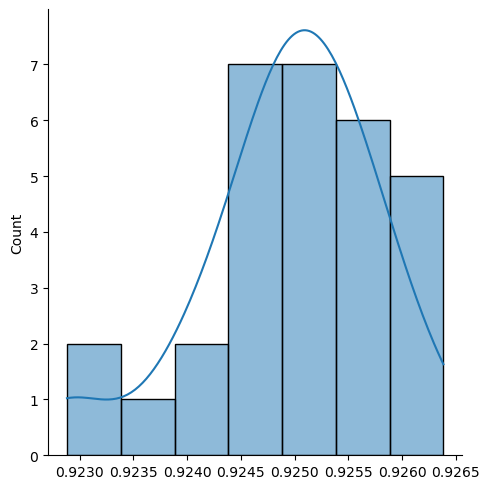

In [23]:
sns.displot(results_naive_bayes_cv, kde=True)

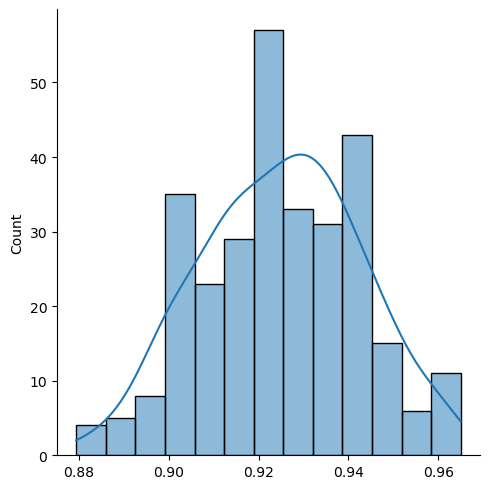

In [24]:
sns.displot(results_naive_bayes_cv_300, kde=True)

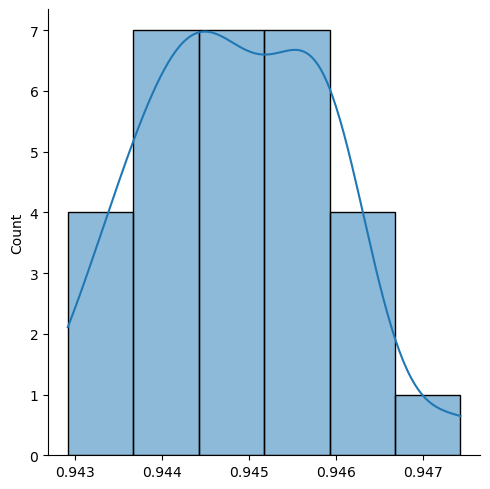

In [25]:
sns.displot(results_logistic_cv, kde=True)

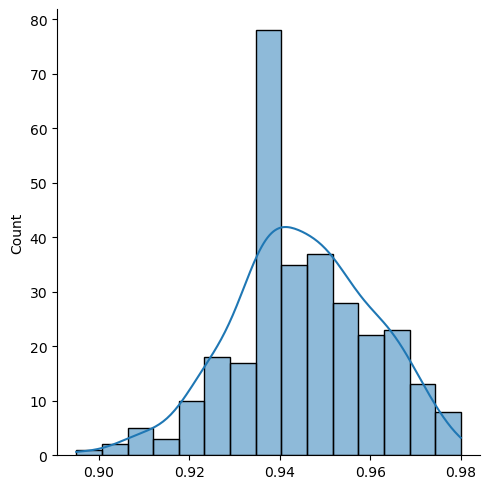

In [26]:
sns.displot(results_logistic_cv_300, kde=True)

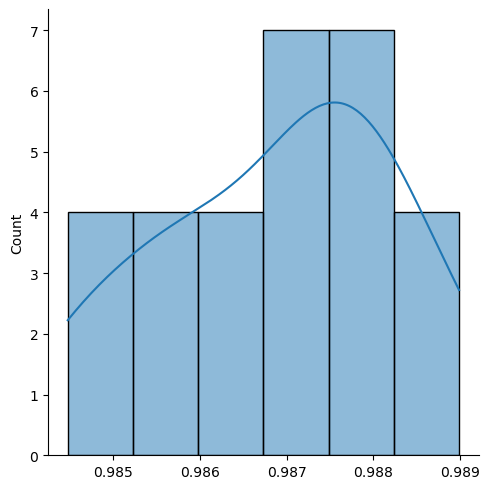

In [27]:
sns.displot(results_random_forest_cv, kde=True)

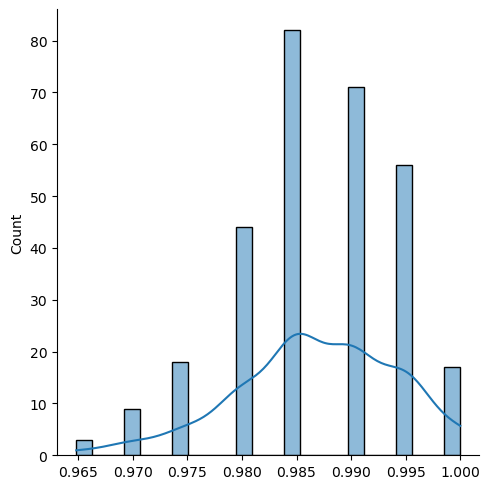

In [28]:
sns.displot(results_random_forest_cv_300, kde=True)

In [29]:
results_naive_bayes_cv.mean(), results_logistic_cv.mean(), results_random_forest_cv.mean()

(0.9249359296482411, 0.9448667504187604, 0.9868968174204354)

In [ ]:
stats.variation(results_naive_bayes_cv) * 100, stats.variation(
    results_logistic_cv
) * 100, stats.variation(results_logistic_cv) * 100

(0.08641071566366061, 0.10802610833013937, 0.10802610833013937)

#### Confidence intervals

##### Naive bayes

In [ ]:
intervals_naive_bayes_t = t.interval(
    0.95,
    len(results_logistic_cv) - 1,
    results_naive_bayes_cv.mean(),
    stats.sem(results_naive_bayes_cv, ddof=0),
)

intervals_naive_bayes_t, abs(results_logistic_cv.mean() - intervals_naive_bayes_t[1])

((0.9246374871248957, 0.9252343721715865), 0.0196323782471739)

In [ ]:
intervals_naive_bayes_n = norm.interval(
    0.95,
    results_naive_bayes_cv_300.mean(),
    stats.sem(results_naive_bayes_cv_300, ddof=0),
)

intervals_naive_bayes_n, abs(
    results_logistic_cv_300.mean() - intervals_naive_bayes_n[1]
)

((0.9229367297175617, 0.9269351295789205), 0.0179316208398399)

##### Logistic regression

In [37]:
intervals_logistic_t = t.interval(
    0.95,
    len(results_logistic_cv) - 1,
    results_logistic_cv.mean(),
    stats.sem(results_logistic_cv, ddof=0),
)

intervals_logistic_t, abs(results_logistic_cv.mean() - intervals_logistic_t[1])

((0.9444856137371328, 0.9452478871003881), 0.00038113668162764736)

In [38]:
intervals_logistic_n = norm.interval(
    0.95,
    results_logistic_cv_300.mean(),
    stats.sem(results_logistic_cv_300, ddof=0),
)

intervals_logistic_n, abs(results_logistic_cv_300.mean() - intervals_logistic_n[1])

((0.9431342903430324, 0.9465992104944885), 0.0017324600757280262)

##### Random Forest

In [39]:
intervals_random_forest_t = t.interval(
    0.95,
    len(results_random_forest_cv) - 1,
    results_random_forest_cv.mean(),
    stats.sem(results_random_forest_cv, ddof=0),
)

intervals_random_forest_t, abs(
    results_random_forest_cv.mean() - intervals_random_forest_t[1]
)

((0.986394625310819, 0.9873990095300519), 0.0005021921096164395)

In [40]:
intervals_random_forest_n = norm.interval(
    0.95,
    results_random_forest_cv_300.mean(),
    stats.sem(results_random_forest_cv_300, ddof=0),
)

intervals_random_forest_n, abs(
    results_random_forest_cv_300.mean() - intervals_random_forest_n[1]
)

((0.9860633836809691, 0.9877302511599022), 0.0008334337394665381)

In [41]:
kfold = KFold(n_splits=10, shuffle=True)

random_forest_model = RandomForestClassifier()

scores = cross_val_score(random_forest_model, X, y, cv=kfold)

print(
    "Random Forest Classifier Accuracy: %.3f%% (%.3f%%)"
    % (scores.mean() * 100, scores.std() * 100)
)

Random Forest Classifier Accuracy: 98.649% (0.837%)
